In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# Dataset : https://www.kaggle.com/datasets/tigganeha4/diabetes-dataset-2019
df = pd.read_csv('diabetes_dataset__2019.csv')
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [50]:
df.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')

In [51]:
df.Stress.value_counts(dropna=False)

sometimes     564
very often    164
not at all    136
always         88
Name: Stress, dtype: int64

In [52]:
df.Diabetic.value_counts(dropna=False)

no     684
yes    266
 no      1
NaN      1
Name: Diabetic, dtype: int64

In [53]:
# Limpeza e tratamento de dados
df.loc[pd.isnull(df.BMI), 'BMI'] = df.BMI.mean()
df.loc[pd.isnull(df.Pregancies), 'Pregancies'] = 0
df.loc[pd.isnull(df.Pdiabetes), 'Pdiabetes'] = 0
df.loc[pd.isnull(df.Diabetic), 'Diabetic'] = 'no'
df.loc[:, 'Diabetic'] = df.Diabetic.replace(' no', 'no')
df.loc[:, 'Pdiabetes'] = df.Pdiabetes.replace(0, 'no')
df.loc[:, 'RegularMedicine'] = df.RegularMedicine.replace('o', 'no')
df.loc[:, 'BPLevel'] = df.BPLevel.replace('normal ', 'normal').replace('High', 'high').replace('Low', 'low')

In [54]:
df.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')

In [55]:
df_d = pd.get_dummies(df)

In [56]:
df_d

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_high,BPLevel_low,BPLevel_normal,Pdiabetes_0,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes
0,39.0,8,6,0.0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
1,28.0,8,6,0.0,0,1,0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
2,24.0,6,6,0.0,1,0,0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
3,23.0,8,6,0.0,0,1,0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
4,27.0,8,8,0.0,1,0,0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,25.0,8,6,0.0,0,0,0,1,0,1,...,0,0,1,1,0,0,1,0,0,1
948,27.0,6,5,0.0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
949,23.0,6,5,0.0,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0
950,27.0,6,5,0.0,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0


In [59]:
X = df_d.div(df_d.sum(axis=1), axis=0)

In [60]:
X

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_high,BPLevel_low,BPLevel_normal,Pdiabetes_0,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes
0,0.582090,0.119403,0.089552,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.014925,...,0.014925,0.0,0.000000,0.014925,0.0,0.0,0.014925,0.000000,0.014925,0.000000
1,0.500000,0.142857,0.107143,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.017857,...,0.000000,0.0,0.017857,0.017857,0.0,0.0,0.017857,0.000000,0.017857,0.000000
2,0.480000,0.120000,0.120000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.000000,0.0,0.020000,0.020000,0.0,0.0,0.020000,0.000000,0.020000,0.000000
3,0.450980,0.156863,0.117647,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000,0.019608,...,0.000000,0.0,0.019608,0.019608,0.0,0.0,0.019608,0.000000,0.019608,0.000000
4,0.473684,0.140351,0.140351,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.017544,...,0.000000,0.0,0.017544,0.017544,0.0,0.0,0.017544,0.000000,0.017544,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.471698,0.150943,0.113208,0.000000,0.000000,0.000000,0.000000,0.018868,0.000000,0.018868,...,0.000000,0.0,0.018868,0.018868,0.0,0.0,0.018868,0.000000,0.000000,0.018868
948,0.519231,0.115385,0.096154,0.000000,0.000000,0.000000,0.019231,0.000000,0.000000,0.019231,...,0.019231,0.0,0.000000,0.019231,0.0,0.0,0.000000,0.019231,0.000000,0.019231
949,0.479167,0.125000,0.104167,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.020833,...,0.020833,0.0,0.000000,0.020833,0.0,0.0,0.020833,0.000000,0.020833,0.000000
950,0.519231,0.115385,0.096154,0.000000,0.000000,0.000000,0.019231,0.000000,0.000000,0.019231,...,0.019231,0.0,0.000000,0.019231,0.0,0.0,0.019231,0.000000,0.019231,0.000000


In [63]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=8)
km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([7, 2, 2, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 3, 5, 4, 6, 2, 5, 6, 2, 4,
       4, 3, 6, 5, 6, 2, 2, 3, 2, 3, 4, 4, 6, 5, 2, 6, 6, 6, 2, 2, 1, 6,
       6, 6, 7, 7, 1, 4, 6, 0, 6, 2, 7, 4, 5, 7, 6, 5, 5, 7, 5, 5, 7, 6,
       6, 4, 4, 4, 4, 3, 6, 4, 4, 6, 6, 6, 7, 4, 6, 6, 6, 7, 2, 2, 0, 6,
       0, 0, 0, 2, 6, 5, 7, 2, 6, 0, 5, 2, 2, 2, 6, 3, 3, 6, 6, 4, 4, 6,
       4, 7, 4, 2, 2, 0, 7, 0, 6, 0, 6, 4, 2, 7, 1, 7, 2, 2, 3, 6, 0, 2,
       6, 4, 5, 6, 5, 2, 5, 5, 6, 2, 7, 7, 7, 7, 1, 7, 2, 2, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 2, 7, 1, 1, 1, 7, 7, 7, 1, 1, 7, 1, 1, 1, 7, 1,
       7, 7, 3, 6, 3, 6, 6, 5, 5, 5, 2, 5, 2, 2, 5, 2, 5, 5, 6, 2, 2, 5,
       5, 7, 0, 0, 2, 7, 2, 5, 0, 0, 7, 0, 2, 7, 6, 2, 2, 7, 3, 6, 5, 2,
       2, 0, 7, 1, 1, 1, 1, 7, 1, 2, 3, 2, 6, 6, 4, 2, 4, 4, 7, 2, 2, 6,
       6, 5, 6, 5, 6, 5, 5, 6, 6, 3, 5, 4, 6, 2, 5, 6, 2, 4, 4, 3, 6, 5,
       6, 2, 2, 3, 2, 3, 4, 4, 6, 5, 2, 6, 6, 6, 2, 2, 1, 6, 6, 6, 7, 7,
       1, 4, 6, 0, 6, 2, 7, 4, 5, 7, 6, 5, 5, 7, 5,

In [65]:
distortions = []
n_clusters = range(2,15)
for n_clus in n_clusters :
  km = KMeans(n_clusters=n_clus, max_iter=10_000, n_init=100, random_state=61658).fit(X)
  distortions.append(km.inertia_)

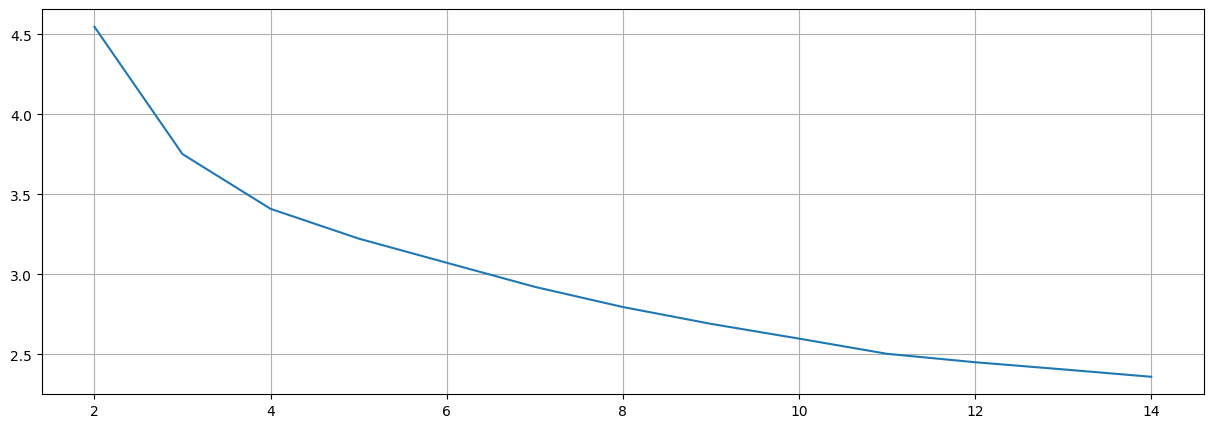

In [70]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distortions)
plt.grid()

In [71]:
X_t = KMeans(n_clusters=4, max_iter=10_000, n_init=100, random_state=61658).fit_predict(X)
X_t

array([2, 1, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 1, 0, 0, 3, 0, 0, 1,
       1, 3, 0, 3, 0, 1, 1, 3, 1, 3, 1, 1, 0, 3, 1, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 3, 1, 0, 3, 3, 1, 3, 3, 1, 0,
       0, 1, 1, 1, 1, 3, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 3, 1, 1, 0, 0, 3, 1, 0, 0, 0, 3, 3, 0, 0, 1, 1, 0,
       1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 3, 0, 1, 1,
       0, 1, 0, 0, 3, 1, 3, 3, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 0, 3, 0, 0, 3, 3, 3, 1, 3, 1, 0, 0, 1, 0, 3, 0, 1, 1, 3,
       3, 1, 0, 0, 1, 2, 1, 3, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 3, 0, 3, 0,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0,
       0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 1, 0, 0, 3, 0, 0, 1, 1, 3, 0, 3,
       0, 1, 1, 3, 1, 3, 1, 1, 0, 3, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2,
       2, 1, 0, 0, 0, 0, 1, 1, 3, 1, 0, 3, 3, 1, 3,